# Jupyter Notebook to Draw Our Graphs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import re
import os

In [34]:
def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=3200, node_color='blue', node_alpha=0.3,
               node_text_size=24,
               edge_color='blue', edge_alpha=0.3, edge_tickness=2,
               edge_text_pos=0.6,
               text_font='sans-serif'):
    G=nx.Graph()
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    # These are different layouts for the network you may try.
    # Shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.spectral_layout(G)
    else:
        graph_pos=nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    plt.show()

def read_input_file(path, max_size=None):
    """
    Parses and validates an input file

    :param path: str, a path
    :return: networkx Graph is the input is well formed, AssertionError thrown otherwise
    """
    with open(path, "r") as fo:
        n = fo.readline().strip()
        assert n.isdigit()
        n = int(n)

        lines = fo.read().splitlines()
        fo.close()

        # validate lines
        for line in lines:
            tokens = line.split(" ")

            assert len(tokens) == 3
            assert tokens[0].isdigit() and int(tokens[0]) < n
            assert tokens[1].isdigit() and int(tokens[1]) < n
            assert bool(re.match(r"(^\d+\.\d{1,3}$|^\d+$)", tokens[2]))
            assert 0 < float(tokens[2]) < 100

        G = nx.parse_edgelist(lines, nodetype=int, data=(("weight", float),))
        G.add_nodes_from(range(n))

        assert nx.is_connected(G)

        if max_size is not None:
            assert len(G) <= max_size

        return G

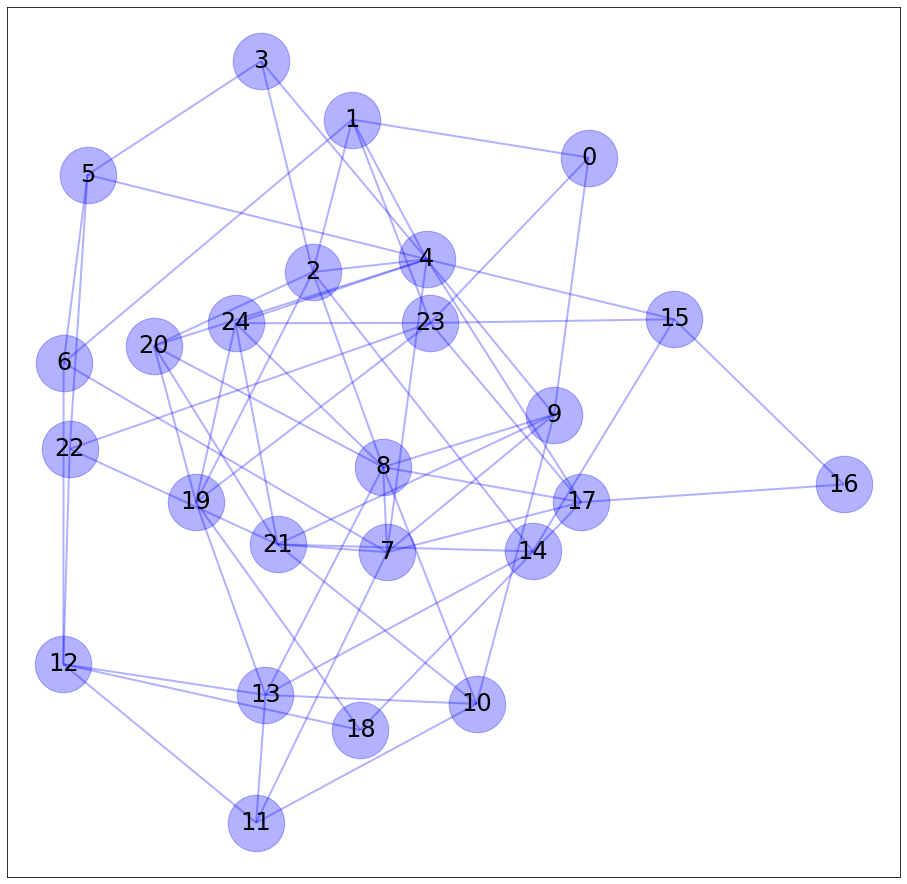

In [35]:
G = read_input_file('../inputs/small-28.in')
plt.figure(figsize=(16,16))
draw_graph(list(G.edges()))

In [33]:
print(G.edges())

[(0, 1), (0, 9), (0, 23), (1, 2), (1, 23), (1, 4), (1, 6), (2, 3), (2, 4), (2, 14), (2, 19), (2, 20), (2, 8), (3, 4), (3, 5), (4, 5), (4, 9), (4, 24), (4, 7), (4, 20), (4, 15), (4, 17), (5, 6), (5, 22), (6, 7), (6, 12), (7, 8), (7, 9), (7, 21), (7, 17), (7, 11), (8, 9), (8, 17), (8, 13), (8, 10), (8, 24), (8, 20), (9, 10), (9, 21), (10, 11), (10, 21), (10, 13), (11, 12), (11, 13), (12, 13), (12, 22), (12, 18), (13, 14), (13, 19), (14, 15), (14, 21), (15, 16), (15, 23), (16, 17), (17, 18), (17, 23), (18, 19), (19, 20), (19, 24), (19, 23), (20, 21), (21, 22), (21, 24), (22, 23), (23, 24)]
